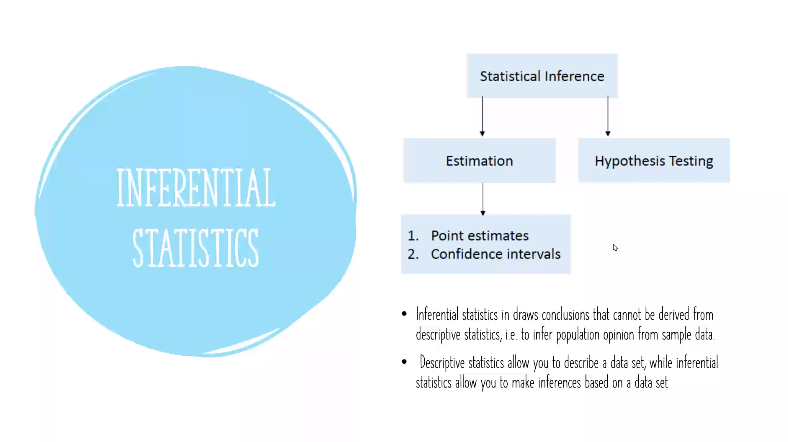

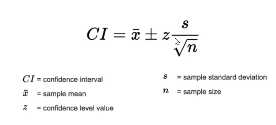

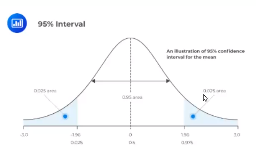

In [ ]:
import numpy as np 
import scipy.stats as stats
n= 50
x_bar = 400
s= 100
alpha = 0.025 # shaded part(significance level)
z = 1 - alpha # unshaded part(confidence level)


z = stats.norm.ppf(1 - alpha/2)
margin_of_error = z*(s/np.sqrt(n))

In [1]:
path = "C:\\Users\\alok\\Downloads\\students.csv"
import pandas as pd 
df = pd.read_csv(path)

In [2]:
df.columns

Index(['stud.id', 'name', 'gender', 'age', 'height', 'weight', 'religion',
       'nc.score', 'semester', 'major', 'minor', 'score1', 'score2',
       'online.tutorial', 'graduated', 'salary'],
      dtype='object')

In [3]:
age_mean = df['age'].mean()
print("Mean", age_mean)
age_std = df['age'].std()
print("STD", age_std)
age_variance = df['age'].var
print("Variance", age_mean)

Mean 22.541570578953756
STD 6.0651107451671535
Variance 22.541570578953756


In [4]:
# Sample
age_sample = df['age']
age_sample[:1000]

1       19
2       19
3       22
4       19
5       21
        ..
996     22
997     20
998     21
999     21
1000    22
Name: age, Length: 1000, dtype: int64

In [8]:
sample = df['age'].sample(n= 1000, random_state=1)
mean = sample.mean()
std = sample.std()
variance = sample.var()

In [11]:
standard_error = std / (1000 ** 0.5)
print("Standard Error of the Sample Mean:", standard_error)

Standard Error of the Sample Mean: 0.19490251663585823


In [12]:
samples = []
means = []
stds = []
variances = []
for i in range(20):
    sample = df['age'].sample(n=1000)  
    mean = sample.mean()
    std = sample.std()
    variance = sample.var()
    samples.append(sample)
    means.append(mean)
    stds.append(std)
    variances.append(variance)



In [15]:
# standard error for huge number of samples
import numpy as np
np.array(means).std()

0.2193212484006057

# Hypothesis

In [ ]:
import pandas as pd 
import numpy as np 
from sklearn.datasets import fetch_california_housing

cal = fetch_california_housing()
cal_df = pd.DataFrame(cal.data, columns = cal.feature_names)
cal_df['target '] = cal.target
cal_df

In [ ]:
# generate Sample n = 200
sample_size = 200
sample = cal_df['target '].sample(n=sample_size, random_state=1)
# get z critical
from scipy.stats import norm
z_critical = norm.ppf(0.975)  
z_critical
# Population SD
population_sd = cal_df['target '].std()
print("population_sd",population_sd)

# margin error
margin_error = z_critical * (population_sd / np.sqrt(sample_size))
print("margin_error", margin_error)

# conf interval
confidence_interval = (sample.mean() - margin_error, sample.mean() + margin_error)
print("conf interval", confidence_interval)

![image.png](attachment:image.png)

In [1]:
pop_mean = 5
sample_mean = 2
s_std = 3
sample_size = 50
z_critical = norm.ppf(0.975)  
margin_error = z_critical * (s_std / np.sqrt(sample_size))
interval = (2 - margin_error, 2 + margin_error)

if sample_mean>interval[0] and sample_mean<interval[1]:
    print('accept')
else:
    print("reject")

NameError: name 'norm' is not defined

# oneSample ttest
# independent sample ttest: comparison between 2 samples [independent sample t test]
# paired sample ttest: 2 sample but over a period of time

In [2]:
path = "C:\\Users\\alok\\Downloads\\students.csv"

In [ ]:
data = pd.read_csv(path)
null = "the avg height is 170 cms"
alternate = "the avg height is not 170 cms"
heights = data.height.sample(n= 20, random_state=1)
h0_mean = 170
# significance level
alpha = 0.05

dof = 19


from scipy import stats
from scipy.stats import t
p = 1-(alpha/2)
t_critical = t.ppf(p,dof)
t_critical

t_statistic, p_value = stats.ttest_1samp(heights, h0_mean)



# Compare p-value 
if p_value < alpha:
    print("Reject the null hypothesis. There is evidence to support the alternative hypothesis:", alternate)
else:
    print("Fail to reject the null hypothesis. There is not enough evidence to support the alternative hypothesis:", alternate)


print("Test Statistic:", t_statistic)
print("p-value:", p_value)

males = data[data.gender=="Male"]["nc.score"].sample(n=30, random_state=1)
females = data[data.gender=="Female"]["nc.score"].sample(n=30, random_state=1)

alpha

# dof = (pehla smp_size - 1) + (dusra smp size - 1) 
dof = (30- 1) + (30 - 1) 
dof

t_critical = t.ppf(p,dof)
from scipy.stats import ttest_ind
_, p_value = ttest_ind(males,females)
p_value<alpha
p_value